# Chapter 9 - Recap

This chapter was about advanced methods to sample from the posterior. The methods discussed were:

* Gibbs Sampling
* Metropolis Algorithm
* Hamiltonian Monte Carlo (HMC)

In [1]:
library(rethinking)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: parallel

rethinking (Version 2.13)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [2]:
data(rugged)
d <- rugged
d$log_gdp <- log(d$rgdppc_2000)
dd <- d[complete.cases(d$rgdppc_2000), ]
dd$log_gdp_std <- dd$log_gdp/mean(dd$log_gdp)
dd$rugged_std <- dd$rugged/mean(dd$rugged)
dd$cid <- ifelse(dd$cont_africa ==1, 1, 2)

### quadratic approximation

In [3]:
m8.3 <- quap(
    alist(
        log_gdp_std ~ dnorm(mu, sigma),
        mu <- a[cid] + b[cid]*(rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1),
        b[cid] ~ dnorm(0, 0.3),
        sigma ~ dexp(1)
    ), data=dd
)
precis(m8.3, depth=2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.86533283,0.018339944,0.836022062,0.89464361
a[2],1.07451072,0.014112114,1.051956841,1.09706461
b[1],0.02748233,0.016364436,0.001328799,0.05363586
b[2],-0.03078658,0.011900573,-0.049805993,-0.01176716
sigma,0.10950382,0.005936814,0.100015642,0.11899199


### hamiltonian monte carlo

Creating a list as input

In [4]:
dat_slim <- list(
    log_gdp_std = dd$log_gdp_std,
    rugged_std = dd$rugged_std,
    cid=as.integer(dd$cid)
)
str(dat_slim)

List of 3
 $ log_gdp_std: num [1:170] 0.88 0.965 1.166 1.104 0.915 ...
 $ rugged_std : num [1:170] 0.644 2.571 0.577 0.581 2.016 ...
 $ cid        : int [1:170] 1 2 2 2 2 2 2 2 2 1 ...


sampling from the posterior

In [5]:
m9.1 <- ulam(
    alist(
        log_gdp_std ~ dnorm(mu, sigma),
        mu <- a[cid] + b[cid] * (rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1),
        b[cid] ~ dnorm(0, 0.3),
        sigma ~ dexp(1)
    ), data=dat_slim, chains=4, cores=4
)

In [6]:
precis(m9.1, depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.86537145,0.018721322,0.835276215,0.89505466,1205.881,0.9997093
a[2],1.07485944,0.014422074,1.051975939,1.09830527,1415.161,1.0011509
b[1],0.02781228,0.016317964,0.001182862,0.05432405,1267.996,1.0005086
b[2],-0.03096815,0.012134720,-0.049761518,-0.01087357,1518.890,1.0009515
sigma,0.11140646,0.006422038,0.101975960,0.12251036,1551.302,0.9993577


In [7]:
show(m9.1)

Hamiltonian Monte Carlo approximation
2000 samples from 4 chains

Sampling durations (seconds):
        warmup sample total
chain:1   0.34   0.22  0.56
chain:2   0.23   0.17  0.40
chain:3   0.24   0.21  0.45
chain:4   0.27   0.18  0.45

Formula:
log_gdp_std ~ dnorm(mu, sigma)
mu <- a[cid] + b[cid] * (rugged_std - 0.215)
a[cid] ~ dnorm(1, 0.1)
b[cid] ~ dnorm(0, 0.3)
sigma ~ dexp(1)


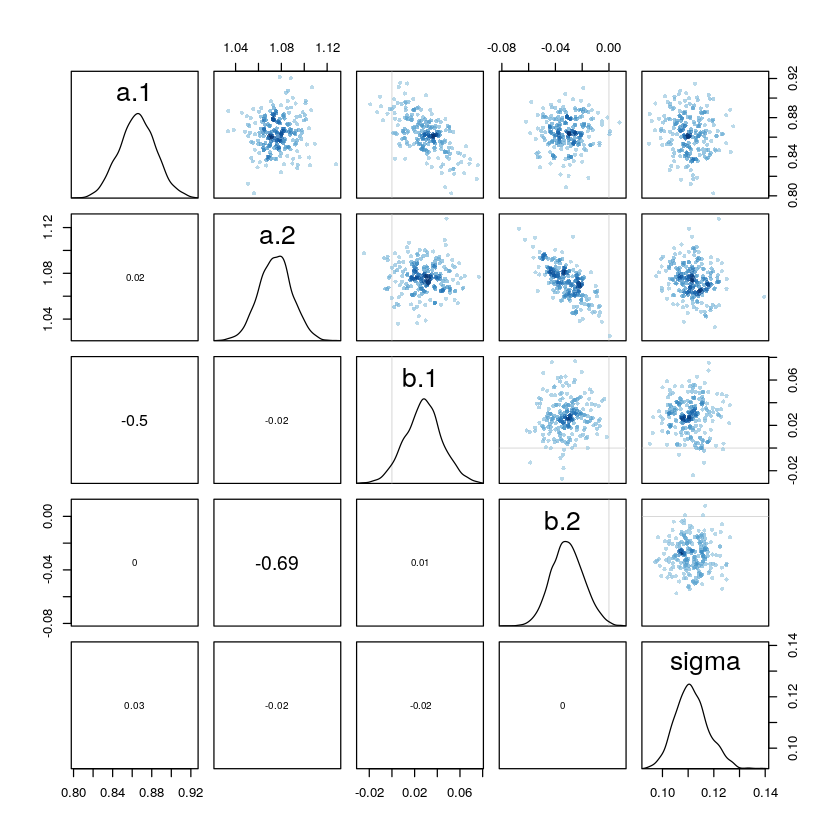

In [8]:
pairs(m9.1)

[1] 1000
[1] 1
[1] 1000


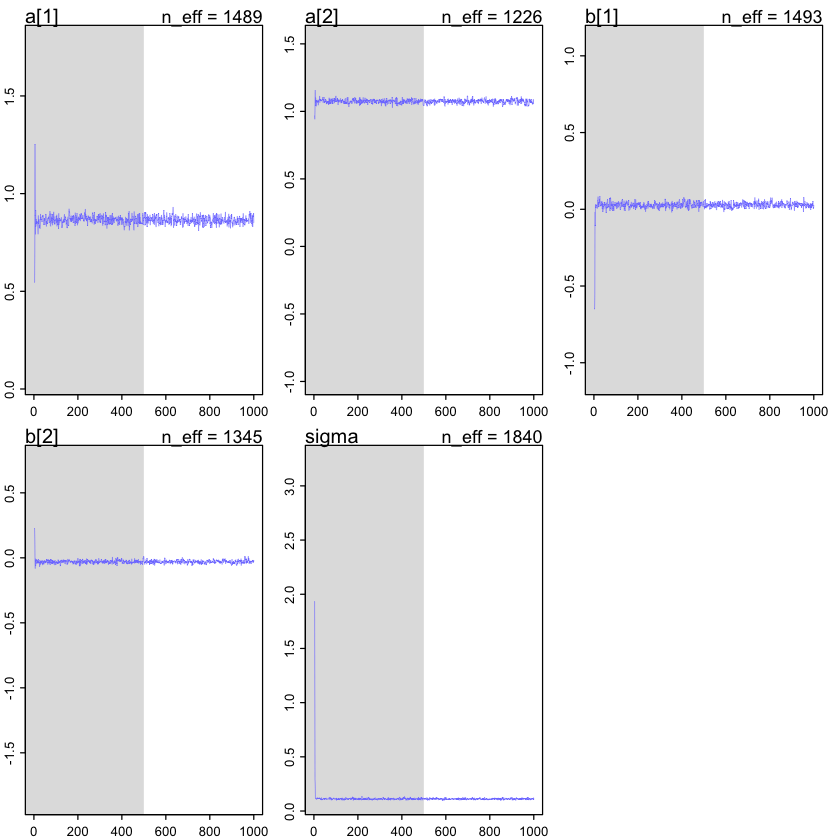

In [35]:
traceplot(m9.1, chains=1)

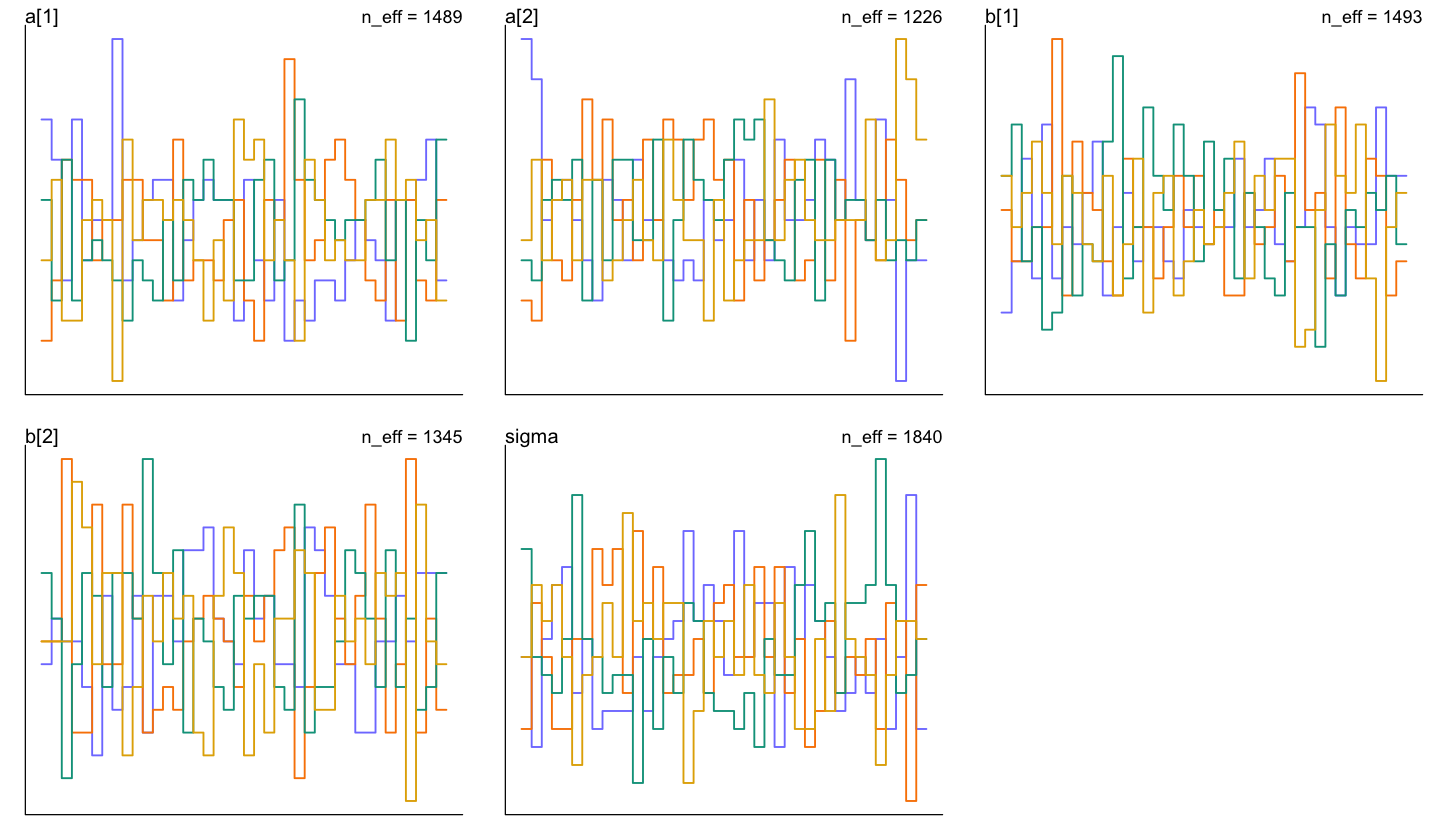

In [42]:
options(repr.plot.width=12, repr.plot.height=7)
trankplot(m9.1)

## taming wild chains

In [37]:
y <- c(-1, 1)
set.seed(11)
m9.2 <- ulam(
    alist(
        y ~ dnorm(mu, sigma),
        mu <- alpha,
        alpha ~ dnorm(0, 1000),
        sigma ~ dexp(0.0001)
    ), data=list(y=y), chains=3
)


SAMPLING FOR MODEL '726d002e27cec1633082261fcfedb813' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.080026 seconds (Warm-up)
Chain 1:                0.012466 seconds (Sampling)
Chain 1:   

Warning message:
“There were 82 divergent transitions after warmup. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 1.07, indicating chains have not mixed.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#tail-ess”


In [38]:
precis(m9.2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
alpha,9.166007,345.619,-437.59025,520.9303,102.8457,1.028324
sigma,620.035602,1514.598,18.53465,2518.8874,198.5740,1.038421


[1] 1000
[1] 1
[1] 1000


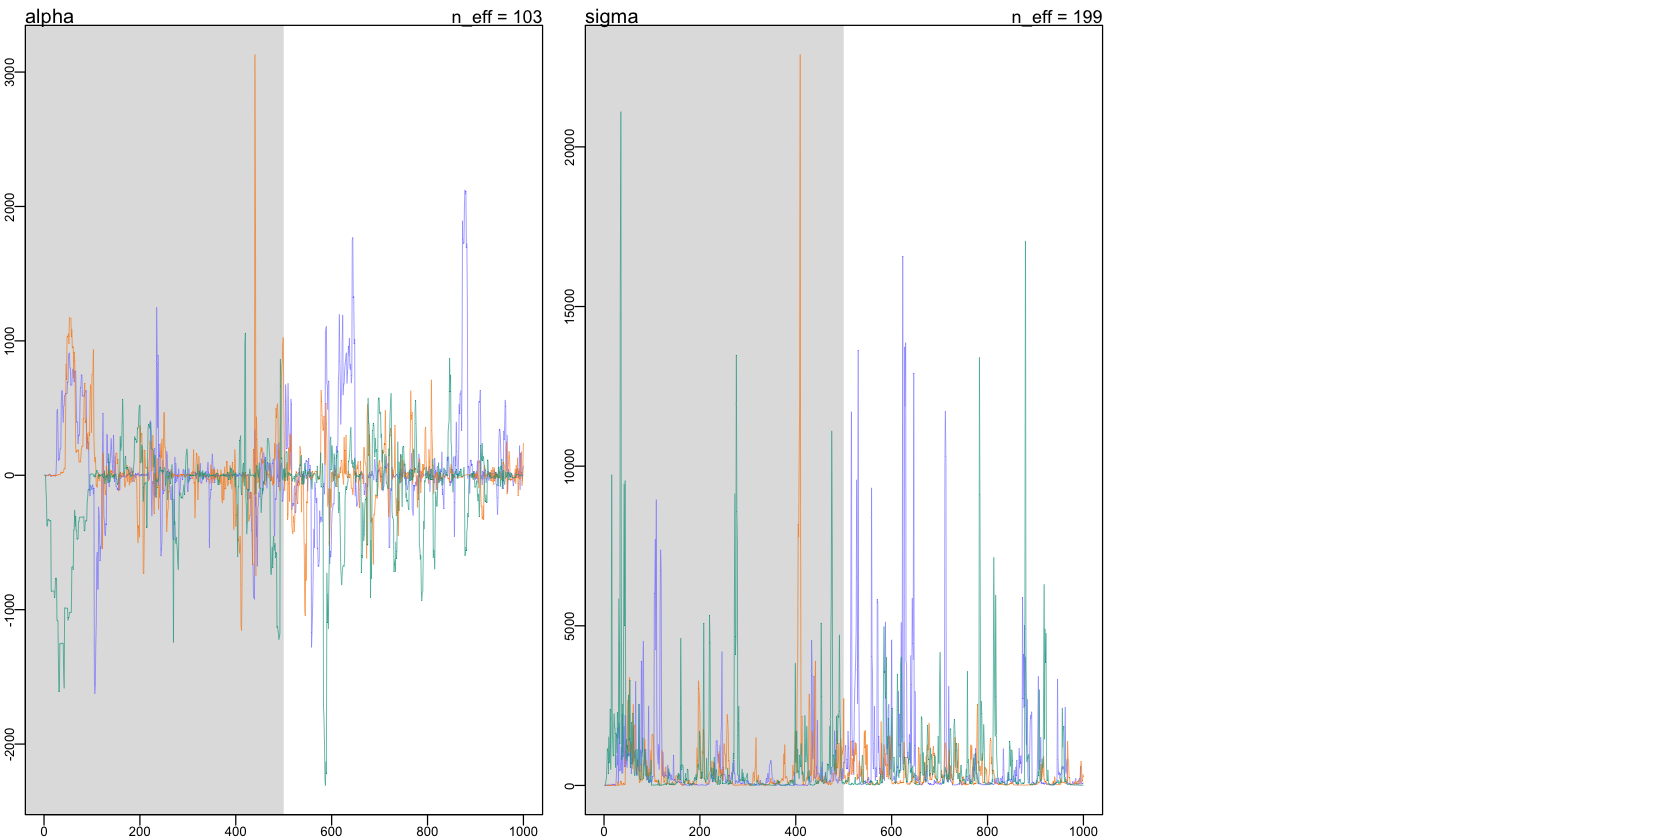

In [47]:
options(repr.plot.width=14, repr.plot.height=7)
traceplot(m9.2)

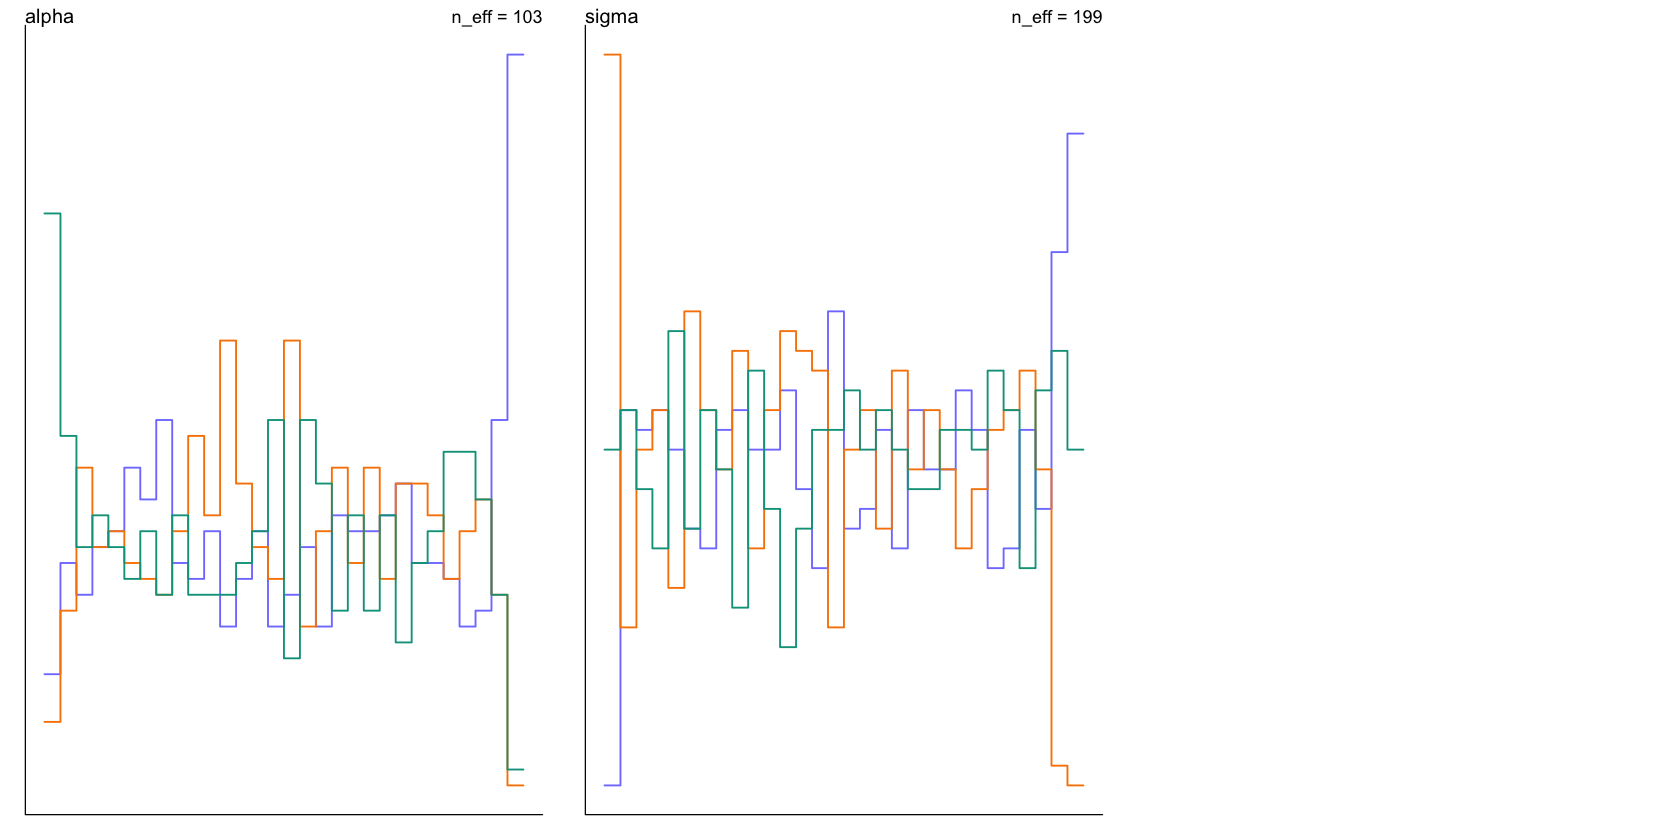

In [48]:
trankplot(m9.2)

In [49]:
set.seed(11)
m9.3 <- ulam(
    alist(
        y ~ dnorm(mu, sigma),
        mu <- alpha,
        alpha ~ dnorm(1, 10),
        sigma ~ dexp(1)
    ), data=list(y=y), chains=3
)
precis(m9.3)


SAMPLING FOR MODEL 'db8b93ccfa83872ce482c35ebed2c618' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.009356 seconds (Warm-up)
Chain 1:                0.007502 seconds (Sampling)
Chain 1:   

Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#tail-ess”


,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
alpha,0.09368772,1.291687,-1.586733,2.282757,294.9239,1.005993
sigma,1.57242939,0.924527,0.693663,3.092426,254.8605,1.003729


[1] 1000
[1] 1
[1] 1000


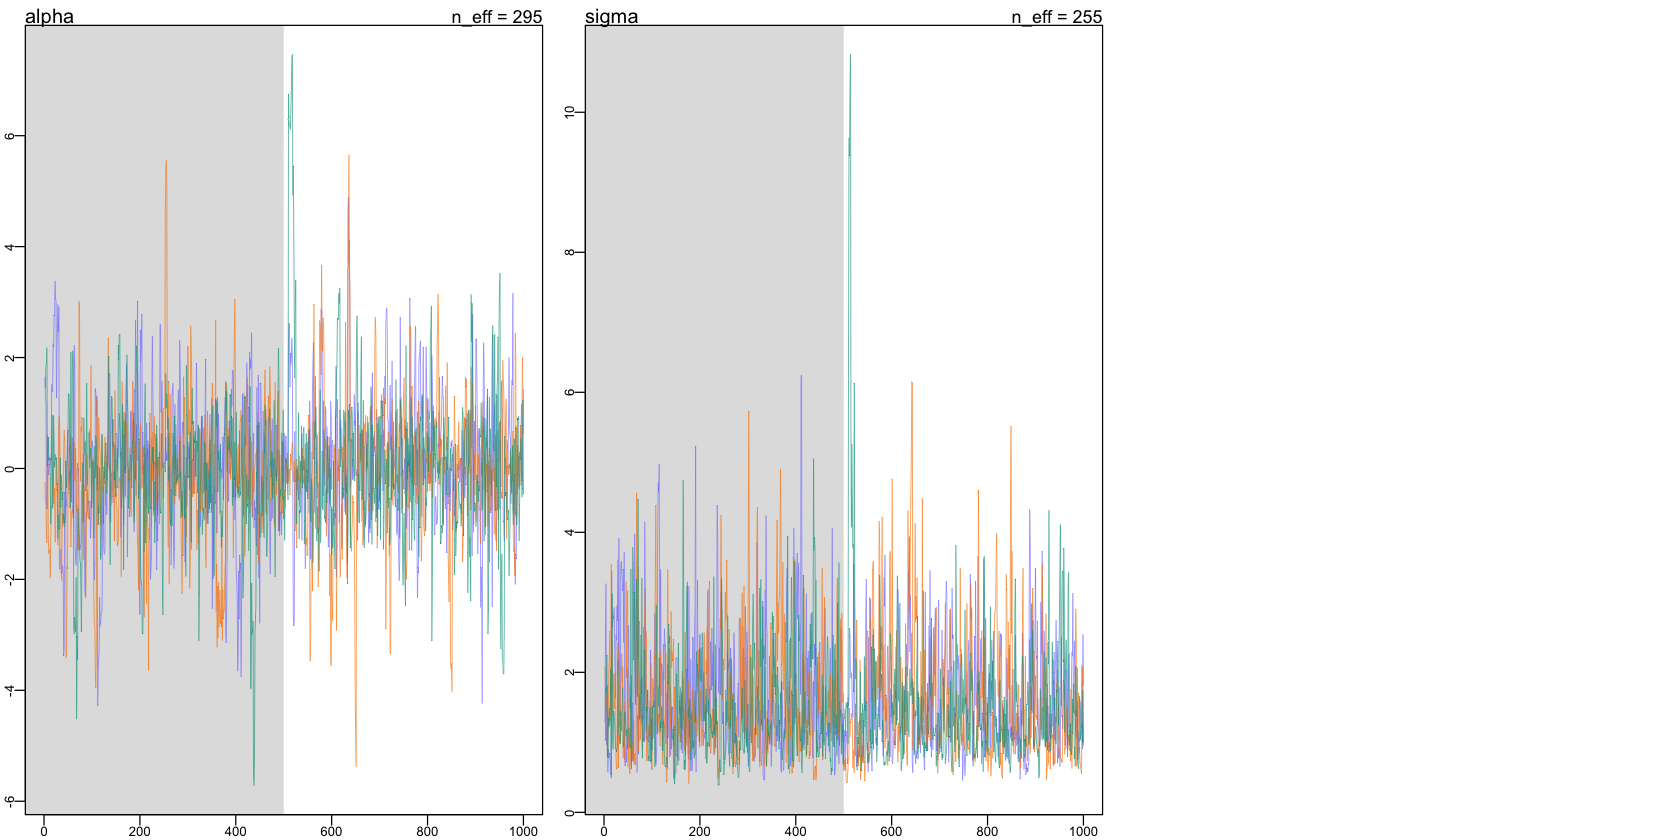

In [50]:
traceplot(m9.3)

## Using Rstan instead of rethinking

In [51]:
library("rstan")

In [53]:
parallel::detectCores()

[1] 4

In [54]:
options(mc.cores = parallel::detectCores())

In [55]:
rstan_options(auto_write = TRUE)

In [58]:
stancode(m9.2)

data{
    vector[2] y;
}
parameters{
    real alpha;
    real<lower=0> sigma;
}
model{
    real mu;
    sigma ~ exponential( 1e-04 );
    alpha ~ normal( 0 , 1000 );
    mu = alpha;
    y ~ normal( mu , sigma );
}



## Practice Problems

**9E1:** Metropolis requires parameters to be discrete

**9E2:** Gibbs achieves extra efficiency over Metropolis through a smarter way to make proposals, so called *adaptive proposals* that allow to make 'smart jumps' around the posterior of all parameters. However, both Metropolis and Gibbs are inefficient for models that have a very high number of parameters. This is because models with many parameters almost always have regions of high correlation in their posterior. The algorithms tend to get stuck in those regions and produce a high share of rejected proposals at the same time.

**9E3:** HMC cannot handle non-identifiable parameters.

**9E4:** `n_eff` is an estimate for the number of independent samples that you managed to sample from your model. In other words, `n_eff` is the length of a Markov chain with no autocorrelation. `n_eff` can be much smaller than the actual number of samples which hints that your chain does not work very well but produces highly autocorrelated samples. If `n_eff` is larger than the actual number of samples, sampling produced an anti-autocorrelated series ('sampling was better than random').

**9E5:** `Rhat` indicates whether the Markov chain converges to the target distribution. If so, the value of `Rhat` converges to 1.

**9M1:**

In [59]:
m9.1b <- ulam(
    alist(
        log_gdp_std ~ dnorm(mu, sigma),
        mu <- a[cid] + b[cid] * (rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1),
        b[cid] ~ dnorm(0, 0.3),
        sigma ~ dunif(0,1)
    ), data=dat_slim, chains=4, cores=4
)

In [72]:
m9.1c <- ulam(
    alist(
        log_gdp_std ~ dnorm(mu, sigma),
        mu <- a[cid] + b[cid] * (rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1),
        b[cid] ~ dnorm(0, 0.3),
        sigma ~ dunif(1,2)
    ), data=dat_slim, chains=4, cores=4
)

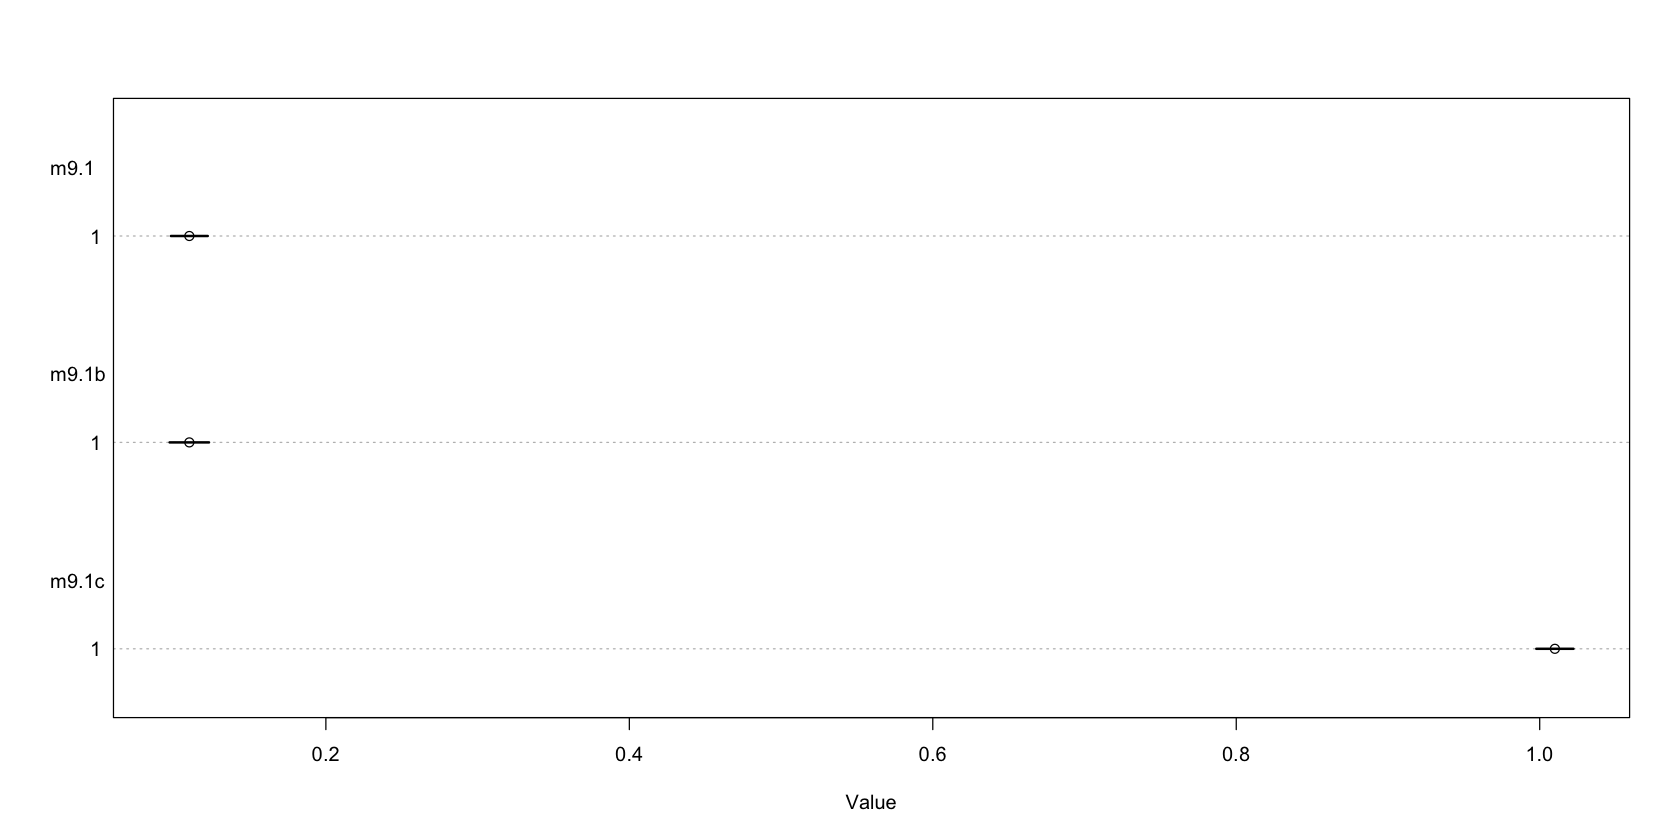

In [73]:
plot(coeftab(m9.1, m9.1b, m9.1c), pars=c('sigma'))

The posterior for sigma seems to be almost identical for both models. This is because...
* the posterior mean for sigma in m9.1 and m9.1b is in the interval [0, 1]. Were it outside, the uniform prior would not allow this value as demonstrated by m9.1c.
* the priors are overwhelmed by the likelihood of the data

**9M2:**

In [74]:
m9.1d <- ulam(
    alist(
        log_gdp_std ~ dnorm(mu, sigma),
        mu <- a[cid] + b[cid] * (rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1),
        b[cid] ~ dexp(0.3),
        sigma ~ dexp(1)
    ), data=dat_slim, chains=4, cores=4
)

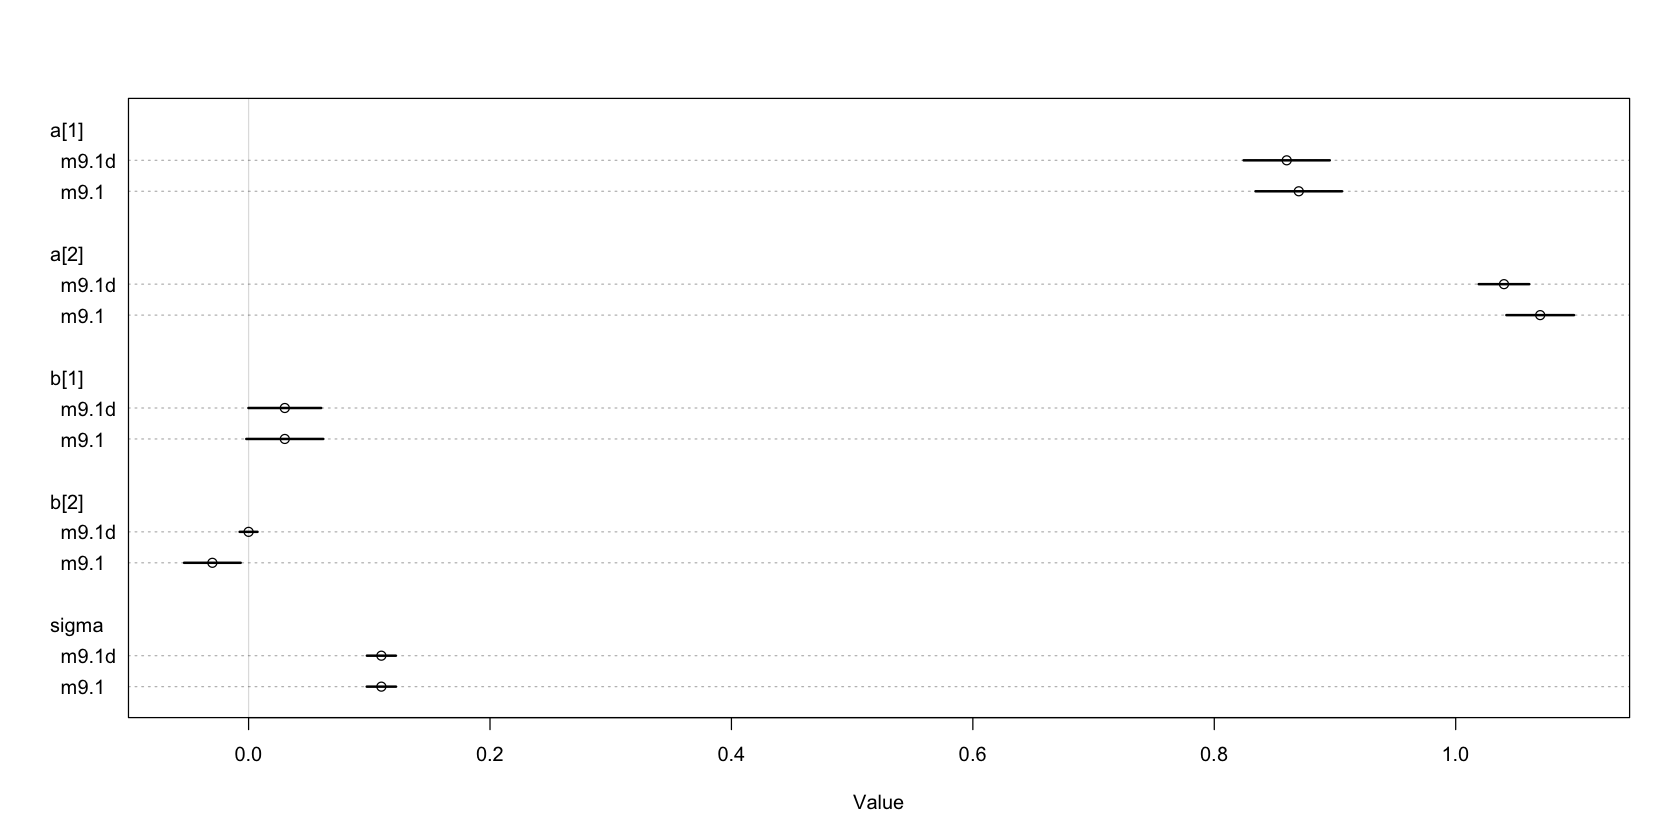

In [79]:
plot(coeftab(m9.1, m9.1d))

The exponential prior restricts the range of possible values for the posterior of b to positive values. 

**9H1:**

In [101]:
mp <- ulam(
    alist(
        a ~ dnorm(0,1),
        b ~ dcauchy(0,1)
    ), data=list(y=1), chains=1
)

recompiling to avoid crashing R session




SAMPLING FOR MODEL '3bd3f4d287e9cccab124308e5415245c' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.2e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.011797 seconds (Warm-up)
Chain 1:                0.012589 seconds (Sampling)
Chain 1:   

Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#tail-ess”


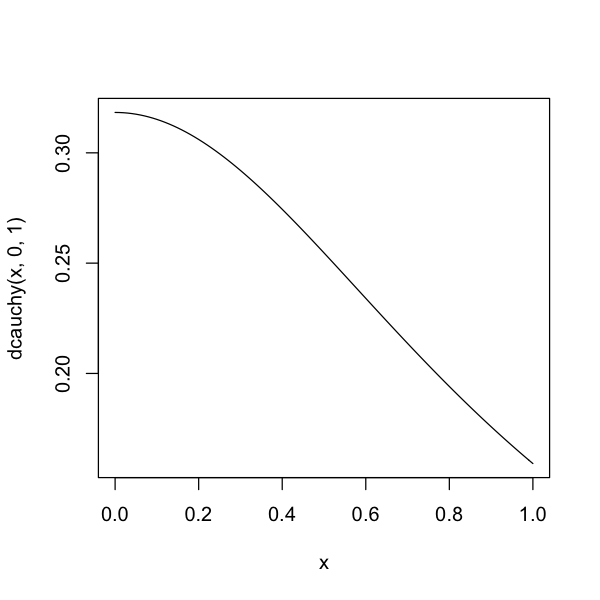

In [103]:
options(repr.plot.width=5, repr.plot.height=5)
curve(dcauchy(x, 0, 1))

[1] 1000
[1] 1
[1] 1000


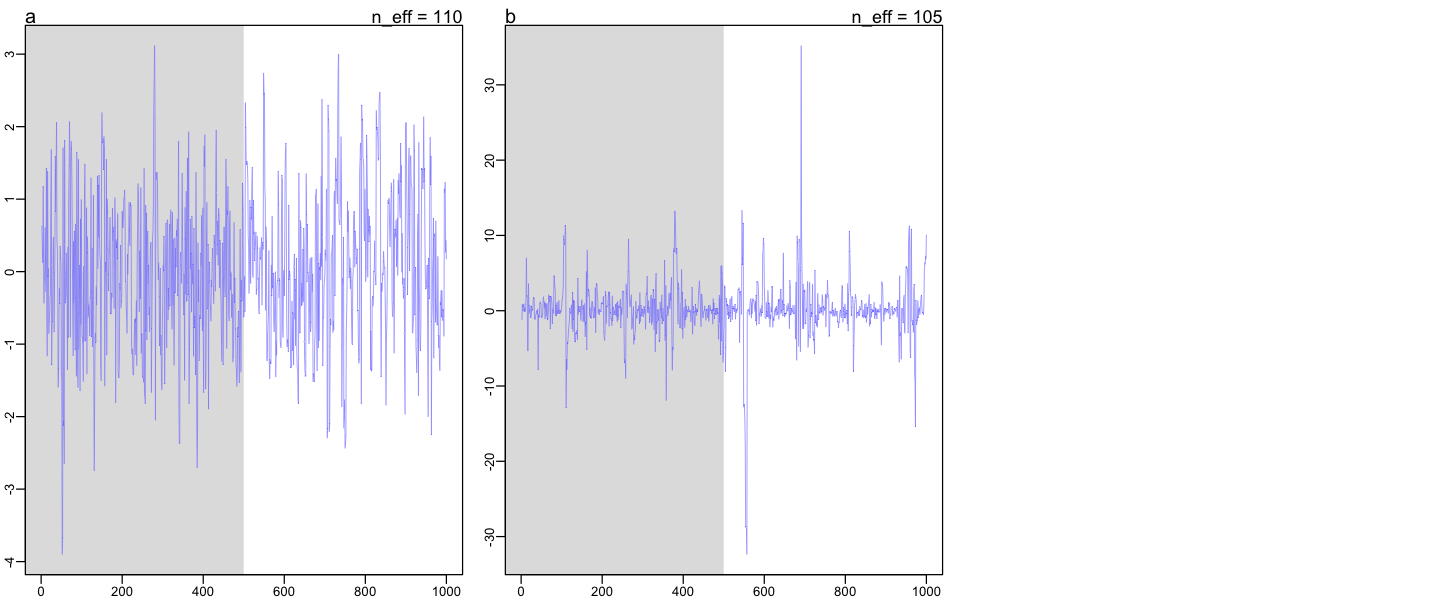

In [105]:
options(repr.plot.width=12, repr.plot.height=5)
traceplot(mp)